### Dataset Source
##### http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Real estate valuation data set.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3558DAAC8>,
      dtype=object)

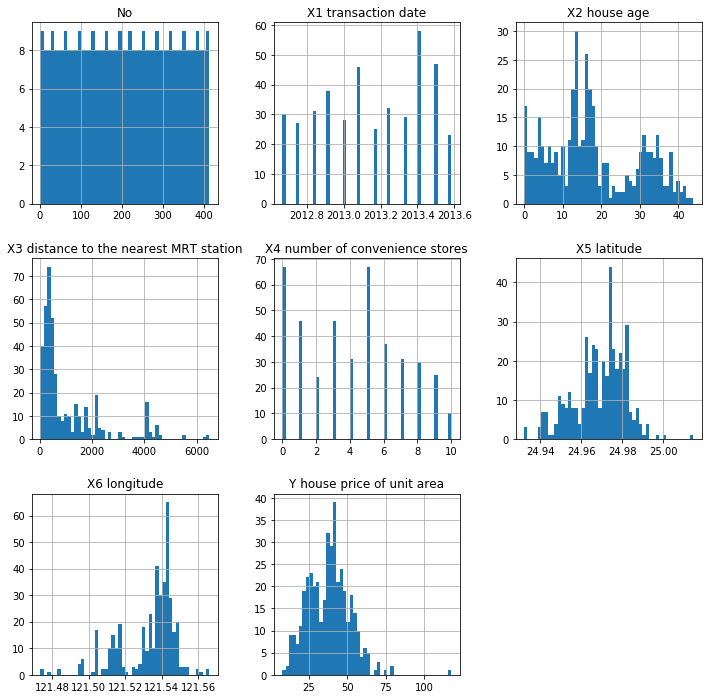

In [3]:
data.hist(bins=50,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3552F2240>,
      dtype=object)

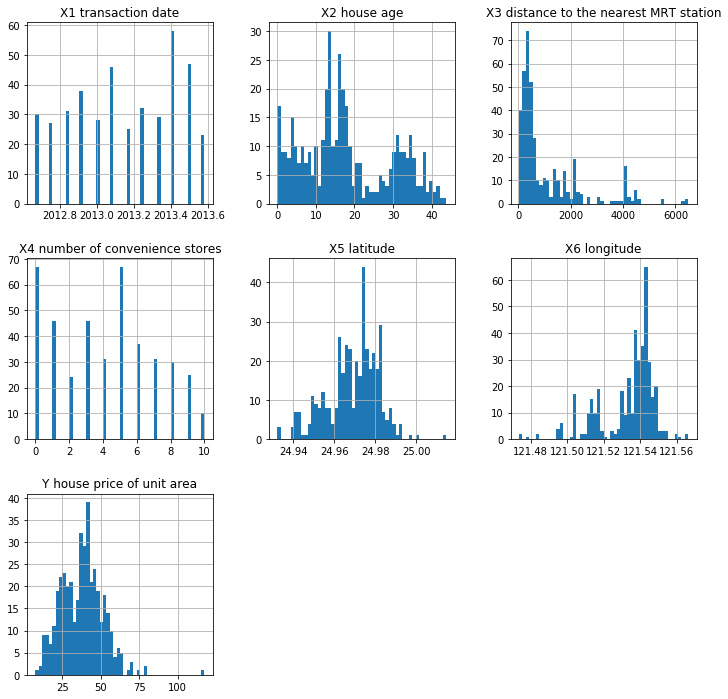

In [4]:
data=data.drop(columns='No')
data.hist(bins=50,figsize=(12,12))

In [5]:
#No Null Attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.7 KB


In [6]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
correlation=data.corr()
correlation['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087529
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [8]:
X=data.drop(columns='Y house price of unit area')
Y=data['Y house price of unit area']

In [9]:
def split_dataset(data,test_size=0.3,random_state=0):
    data_size=len(data)
    if random_state:
        np.random.seed(random_state)
        shuffled_index=np.random.permutation(data_size)
        test_size=int(data_size*test_size)
        test_index=shuffled_index[:test_size]
        train_index=shuffled_index[test_size:]
        return data.iloc[train_index],data.iloc[test_index]
    else:
        shuffled_index=np.random.permutation(data_size)
        test_size=int(data_size*test_size)
        test_index=shuffled_index[:test_size]
        train_index=shuffled_index[test_size:]
        return data.iloc[train_index],data.iloc[test_index]

In [10]:
train,test=split_dataset(data,test_size=0.2)

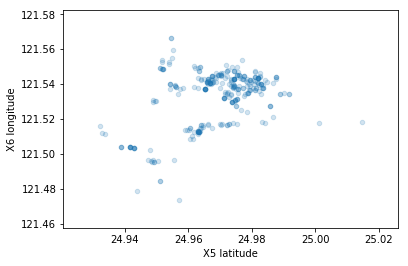

In [11]:
train.plot(x='X5 latitude',y='X6 longitude',kind='scatter',alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E356678198>,
      dtype=object)

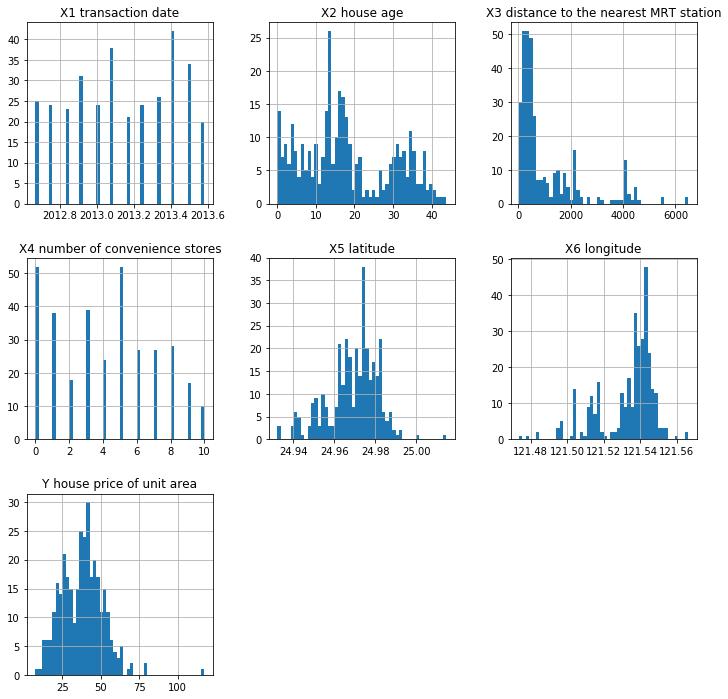

In [12]:
train.hist(bins=50,figsize=(12,12))

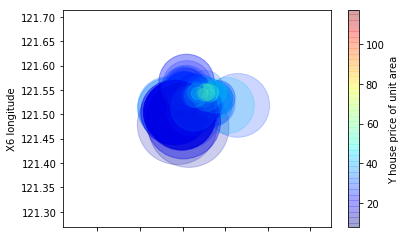

In [13]:
train.plot(x='X5 latitude',y='X6 longitude',kind='scatter',s=train['X3 distance to the nearest MRT station'],
           c='Y house price of unit area',cmap=plt.get_cmap('jet'),alpha=0.2)

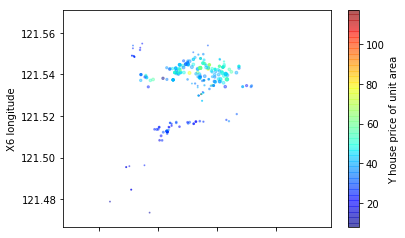

In [14]:
train.plot(x='X5 latitude',y='X6 longitude',kind='scatter',s=train['X4 number of convenience stores'],
           c='Y house price of unit area',cmap=plt.get_cmap('jet'),alpha=0.4)

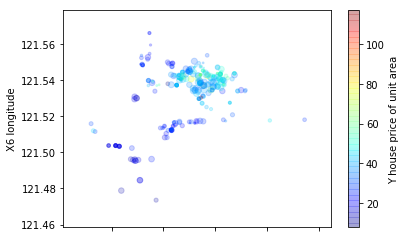

In [15]:
train.plot(x='X5 latitude',y='X6 longitude',kind='scatter',s=train['X2 house age'],
           c='Y house price of unit area',cmap=plt.get_cmap('jet'),alpha=0.2)

In [16]:
print(train.columns)
correlation=train.corr()
correlation['Y house price of unit area'].sort_values(ascending=False)

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


Y house price of unit area                1.000000
X5 latitude                               0.551282
X4 number of convenience stores           0.543748
X6 longitude                              0.522991
X1 transaction date                       0.129260
X2 house age                             -0.175082
X3 distance to the nearest MRT station   -0.665392
Name: Y house price of unit area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3570D5320>,
      dtype=object)

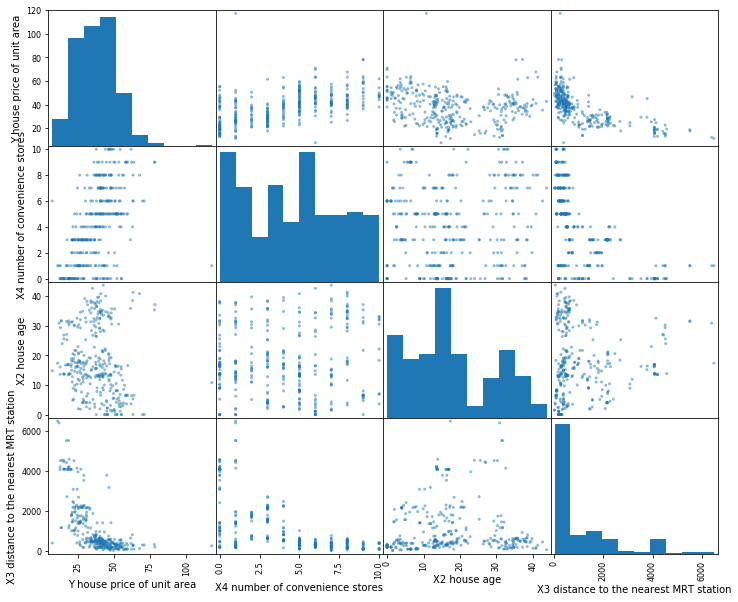

In [17]:
from pandas.plotting import scatter_matrix
attributes=['Y house price of unit area','X4 number of convenience stores','X2 house age','X3 distance to the nearest MRT station']
scatter_matrix(train[attributes],figsize=(12,10))

In [20]:
train_attributes=train.drop(['Y house price of unit area','X1 transaction date'],axis=1)
train_labels=train['Y house price of unit area']
test_attributes=test.drop(['Y house price of unit area','X1 transaction date'],axis=1)
test_label=test['Y house price of unit area']

In [21]:
pipeline=Pipeline([('Standardization',StandardScaler())])

In [22]:
train_prep_data=pipeline.fit_transform(train_attributes)
test_prep_data=pipeline.fit_transform(test_attributes)

In [23]:
model_lin_reg=LinearRegression()
model_lin_reg.fit(train_prep_data,train_labels)
y_pred=model_lin_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

7.802953818647017

In [26]:
from sklearn.linear_model import Ridge
model_ridge_reg=Ridge(alpha=0.1)
model_ridge_reg.fit(train_prep_data,train_labels)
y_pred=model_ridge_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

7.803293952614457

In [27]:
from sklearn.tree import DecisionTreeRegressor
model_dec_reg=DecisionTreeRegressor()
model_dec_reg.fit(train_prep_data,train_labels)
y_pred_dec=model_dec_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred_dec))
accuracy

11.739647027514215

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dec_reg, train_prep_data, train_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores,rmse_scores.mean(),rmse_scores.std()

(array([ 7.67713373, 10.28364725, 10.05709835,  6.20098355, 12.60469489,
         5.2273773 , 15.62025793,  8.72714331,  8.95175199,  6.27478721]),
 9.162487551871463,
 3.010706547708569)

In [29]:
scores = cross_val_score(model_lin_reg, train_prep_data, train_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores,rmse_scores.mean(),rmse_scores.std()

(array([ 8.56146411, 12.11897126,  7.61174403,  5.94792426,  9.10265483,
         7.24321147, 16.63164568,  7.02416697,  7.11009494,  6.59576998]),
 8.794764754263332,
 3.0876583413899987)

In [30]:
from sklearn.ensemble import RandomForestRegressor
model_ran_forest=RandomForestRegressor()
model_ran_forest.fit(train_attributes,train_labels)
y_pred=model_ran_forest.predict(test_attributes)
score=np.sqrt(mean_squared_error(test_label,y_pred))
score

6.975673289257307

In [31]:
from sklearn.svm import SVR

In [32]:
model=SVR()
model.fit(train_attributes,train_labels)
y_pred=model.predict(test_attributes)
score=np.sqrt(mean_squared_error(test_label,y_pred))
score

12.55585219822348

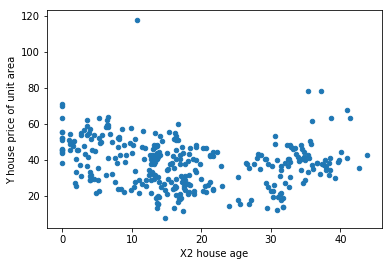

In [33]:
train.plot(x='X2 house age',y='Y house price of unit area',kind='scatter')

In [34]:
train['X2 house age']=np.sqrt(train['X2 house age'])
train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
108,2013.416667,5.603570,592.5006,2,24.97260,121.53561,34.1
235,2012.750000,3.591657,250.6310,7,24.96606,121.54297,39.3
67,2013.500000,2.915476,104.8101,5,24.96674,121.54067,56.8
365,2012.916667,4.159327,2261.4320,4,24.96182,121.51222,29.5
118,2013.500000,5.029911,1583.7220,3,24.96622,121.51709,30.6


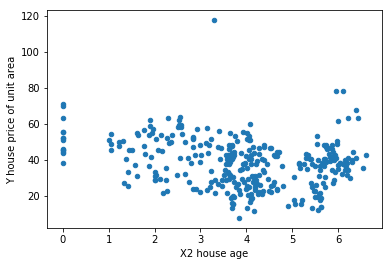

In [35]:
train.plot(x='X2 house age',y='Y house price of unit area',kind='scatter')

In [41]:
train_attributes=train.drop(['Y house price of unit area'],axis=1)
train_labels=train['Y house price of unit area']
test_attributes=test.drop(['Y house price of unit area'],axis=1)
test_label=test['Y house price of unit area']
train_prep_data=pipeline.fit_transform(train_attributes)
test_prep_data=pipeline.fit_transform(test_attributes)

In [42]:
model_lin_reg=LinearRegression()
model_lin_reg.fit(train_prep_data,train_labels)
y_pred=model_lin_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

8.12480078436198

In [43]:
model_ridge_reg=Ridge(alpha=1)
model_ridge_reg.fit(train_prep_data,train_labels)
y_pred=model_ridge_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

8.126000496663885

In [44]:
train_attributes=train.drop(['Y house price of unit area','X1 transaction date'],axis=1)
train_labels=train['Y house price of unit area']
test_attributes=test.drop(['Y house price of unit area','X1 transaction date'],axis=1)
test_label=test['Y house price of unit area']
train_prep_data=pipeline.fit_transform(train_attributes)
test_prep_data=pipeline.fit_transform(test_attributes)

In [45]:
model_lin_reg=LinearRegression()
model_lin_reg.fit(train_prep_data,train_labels)
y_pred=model_lin_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

7.732243922640745

In [46]:
model_ridge_reg=Ridge(alpha=1)
model_ridge_reg.fit(train_prep_data,train_labels)
y_pred=model_ridge_reg.predict(test_prep_data)
accuracy=np.sqrt(mean_squared_error(test_label,y_pred))
accuracy

7.736017599657985